In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
test = pd.read_csv("test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.shape

(891, 12)

In [9]:
test.shape

(418, 11)

In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### EDA

In [41]:
sns.set()
%matplotlib inline

In [46]:
def feature_plot(feature):
    survived = train[train["Survived"] == 1][feature].value_counts()
    dead = train[train["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ["survived", "dead"]
    df.plot(kind = "bar", stacked = True)


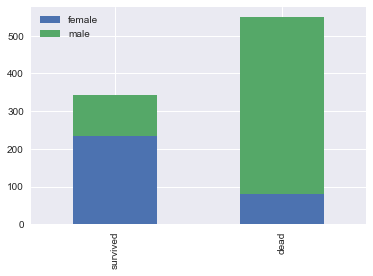

In [48]:
feature_plot("Sex") #here we can see Female have survived more than male

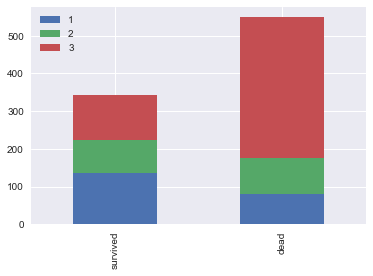

In [52]:
feature_plot("Pclass")

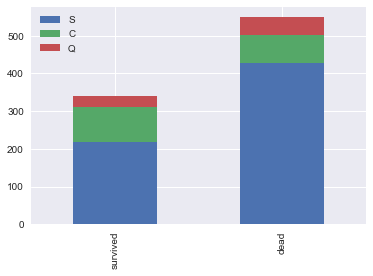

In [56]:
feature_plot("Embarked")

#### Feature engineering

In [10]:
train["Title"] = train["Name"].str.extract("([A-Za-z]+\.)", expand = False)

In [11]:
test["Title"] = test["Name"].str.extract("([A-Za-z]+\.)")

In [12]:
train["Title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Col.           2
Mlle.          2
Major.         2
Mme.           1
Capt.          1
Lady.          1
Ms.            1
Jonkheer.      1
Countess.      1
Sir.           1
Don.           1
Name: Title, dtype: int64

In [14]:
mapping = {"Mr.":0,"Miss.":1,"Mrs.":2,"Master.":3,"Dr.":3,"Rev.":3,"Mlle.":3,"Col.":3,
          "Major":3,"Lady.":3,"Jonkheer.":3,"Mme.":3,"Capt.":3,"Countess.":3,"Don.":3,"Sir.":3,"Ms.":3}

In [13]:
train["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [15]:
train["Title"] = train["Title"].map(mapping)

In [16]:
test["Title"] = test["Title"].map(mapping)

In [17]:
train.drop("Name", axis = 1, inplace = True)
test.drop("Name", axis = 1, inplace = True)

In [18]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


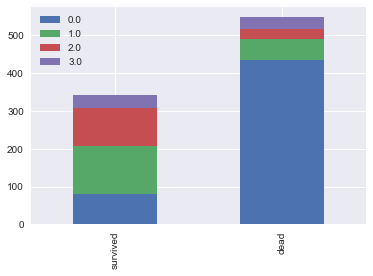

In [72]:
feature_plot("Title")

In [19]:
train["Sex"] = train["Sex"].map({"male":0, "female":1})
test["Sex"] = test["Sex"].map({"male":0, "female":1})

In [20]:
train["Age"].isna().sum()

177

In [21]:
test["Age"].isna().sum()

86

In [22]:
train["Age"] = train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"))
test["Age"] = test["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"))


In [23]:
train["Age"].isna().sum()

0

In [24]:
test["Age"].isna().sum()

0

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0.0


In [26]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
train["Embarked"].fillna("S", inplace = True)
test["Embarked"].fillna("S", inplace = True)

In [28]:
train["Embarked"].isnull().sum()

0

In [29]:
test["Fare"].isnull().sum()

1

In [30]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("mean"), inplace = True)

In [31]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [32]:
train["Cabin"].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [33]:
train["Cabin"] = train["Cabin"].str[0]
test["Cabin"] = test["Cabin"].str[0]

In [34]:
train["Cabin"].head()

0    NaN
1      C
2    NaN
3      C
4    NaN
Name: Cabin, dtype: object

In [35]:
train["Cabin"].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [36]:
train.groupby("Pclass")["Cabin"].agg(pd.Series.mode)

Pclass
1    C
2    F
3    F
Name: Cabin, dtype: object

In [37]:
train["Cabin"].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [38]:
train.drop("Cabin", axis = 1, inplace = True)
test.drop("Cabin", axis = 1, inplace=True)

In [39]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [40]:
train.drop(["SibSp","Parch","Ticket"], axis = 1, inplace=True)
test.drop(["SibSp","Parch","Ticket"], axis = 1, inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,22.0,7.2500,S,0.0,2
1,2,1,1,1,38.0,71.2833,C,2.0,2
2,3,1,3,1,26.0,7.9250,S,1.0,1
3,4,1,1,1,35.0,53.1000,S,2.0,2
4,5,0,3,0,35.0,8.0500,S,0.0,1


In [42]:
train.drop("PassengerId", axis = 1, inplace=True)
test.drop("PassengerId", axis = 1, inplace=True)

In [43]:
train["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [44]:
train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
Embarked       object
Title         float64
FamilySize      int64
dtype: object

In [45]:
test["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [46]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         2
FamilySize    0
dtype: int64

In [47]:
test.isna().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Embarked      0
Title         1
FamilySize    0
dtype: int64

In [48]:
train["Title"].fillna(3,inplace=True)
test["Title"].fillna(3,inplace=True)

In [49]:
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [50]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Title,FamilySize,Embarked_Q,Embarked_S
0,0,3,0,22.0,7.2500,0.0,2,0,1
1,1,1,1,38.0,71.2833,2.0,2,0,0
2,1,3,1,26.0,7.9250,1.0,1,0,1
3,1,1,1,35.0,53.1000,2.0,2,0,1
4,0,3,0,35.0,8.0500,0.0,1,0,1


In [51]:
train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
Title         float64
FamilySize      int64
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [54]:
from sklearn.model_selection import train_test_split

In [56]:
x_df = train.drop("Survived", axis = 1)
y_df = train["Survived"]


In [57]:
x_train,x_val,y_train,y_val = train_test_split(x_df,y_df,train_size = 0.85)


### Model Building

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
LG = LogisticRegression()

In [59]:
LG.fit(x_train,y_train)

C:\Users\Saikrishna\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:
def Model_evaluation(pred,actual):
    print("CLassification Report")
    print(classification_report(pred,actual))
    print("\n")
    print("Accuracy")
    print(accuracy_score(pred,actual))
    print("\n")
    print("Confusion Matrix")
    print(confusion_matrix(pred,actual))

In [63]:
train_pred = LG.predict(x_train)
val_pred = LG.predict(x_val)

In [64]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       477
           1       0.74      0.78      0.76       280

    accuracy                           0.82       757
   macro avg       0.80      0.81      0.80       757
weighted avg       0.82      0.82      0.82       757



Accuracy
0.8163804491413474


Confusion Matrix
[[401  76]
 [ 63 217]]


In [65]:
Model_evaluation(val_pred,y_val)

CLassification Report
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        91
           1       0.76      0.86      0.80        43

    accuracy                           0.87       134
   macro avg       0.84      0.86      0.85       134
weighted avg       0.87      0.87      0.87       134



Accuracy
0.8656716417910447


Confusion Matrix
[[79 12]
 [ 6 37]]


In [66]:
test_pred = LG.predict(test)

In [67]:
sub1 = pd.read_csv("gender_submission.csv")

In [68]:
sub1.shape

(418, 2)

In [70]:
sub1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [74]:
test_pred.shape

(418,)

In [71]:
for i in range(sub1.shape[0]):
    sub1["Survived"][i] = test_pred[i]

In [73]:
sub1.to_csv("LG_Sub.csv", index=False)

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
train_pred = DT.predict(x_train)
val_pred = DT.predict(x_val)

In [83]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       472
           1       0.97      1.00      0.98       285

    accuracy                           0.99       757
   macro avg       0.98      0.99      0.99       757
weighted avg       0.99      0.99      0.99       757



Accuracy
0.9867899603698811


Confusion Matrix
[[463   9]
 [  1 284]]


In [84]:
test_pred = DT.predict(test)

In [85]:
for i in range(sub1.shape[0]):
    sub1["Survived"][i] = test_pred[i]

In [86]:
sub1.to_csv("DT_Sub.csv", index=False)

In [87]:
param_grid = {
    "max_depth":[5,10,15],
    "min_samples_split":[5,10,15,20,30]
}

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
model_cv = GridSearchCV(DT,param_grid=param_grid, cv=5, n_jobs=-1)
model_cv.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'min

In [90]:
model_cv.best_params_

{'max_depth': 10, 'min_samples_split': 15}

In [91]:
train_pred = model_cv.predict(x_train)
val_pred = model_cv.predict(x_val)

In [94]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       482
           1       0.83      0.88      0.86       275

    accuracy                           0.89       757
   macro avg       0.88      0.89      0.88       757
weighted avg       0.89      0.89      0.89       757



Accuracy
0.8916776750330251


Confusion Matrix
[[432  50]
 [ 32 243]]


In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [98]:
train_pred = RF.predict(x_train)
val_pred = RF.predict(x_val)

In [99]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       466
           1       0.98      0.99      0.98       291

    accuracy                           0.99       757
   macro avg       0.99      0.99      0.99       757
weighted avg       0.99      0.99      0.99       757



Accuracy
0.9867899603698811


Confusion Matrix
[[460   6]
 [  4 287]]


In [100]:
Model_evaluation(val_pred,y_val)

CLassification Report
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        90
           1       0.69      0.77      0.73        44

    accuracy                           0.81       134
   macro avg       0.79      0.80      0.79       134
weighted avg       0.82      0.81      0.82       134



Accuracy
0.8134328358208955


Confusion Matrix
[[75 15]
 [10 34]]


In [101]:
test_pred = RF.predict(test)

In [102]:
for i in range(sub1.shape[0]):
    sub1["Survived"][i] = test_pred[i]

In [103]:
sub1.to_csv("RF_Sub.csv", index=False)

In [104]:
params = {
    "n_estimators" : [5,9, 18, 27, 36, 45],
    "max_depth" : [5,8,12,15],
    "min_samples_leaf" : [2, 4]
    
}

In [105]:
RF_grid = GridSearchCV(RF,param_grid=params,cv=5,n_jobs=-1)

In [106]:
RF_grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [107]:
train_pred = RF_grid.predict(x_train)
val_pred = RF_grid.predict(x_val)

In [108]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       492
           1       0.83      0.91      0.87       265

    accuracy                           0.90       757
   macro avg       0.89      0.90      0.89       757
weighted avg       0.91      0.90      0.90       757



Accuracy
0.9022457067371202


Confusion Matrix
[[441  51]
 [ 23 242]]


In [109]:
Model_evaluation(val_pred,y_val)

CLassification Report
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        93
           1       0.69      0.83      0.76        41

    accuracy                           0.84       134
   macro avg       0.81      0.83      0.82       134
weighted avg       0.85      0.84      0.84       134



Accuracy
0.835820895522388


Confusion Matrix
[[78 15]
 [ 7 34]]


In [110]:
test_pred = RF_grid.predict(test)

In [111]:
for i in range(sub1.shape[0]):
    sub1["Survived"][i] = test_pred[i]

In [112]:
sub1.to_csv("RF_grid_Sub.csv", index=False)

In [117]:
from xgboost.sklearn import XGBClassifier

In [118]:
XGB = XGBClassifier()
XGB.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [119]:
train_pred = XGB.predict(x_train)
val_pred = XGB.predict(x_val)

In [120]:
Model_evaluation(train_pred,y_train)

CLassification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.91       499
           1       0.78      0.89      0.83       258

    accuracy                           0.88       757
   macro avg       0.86      0.88      0.87       757
weighted avg       0.89      0.88      0.88       757



Accuracy
0.8797886393659181


Confusion Matrix
[[436  63]
 [ 28 230]]


In [121]:
Model_evaluation(val_pred,y_val)

CLassification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88        94
           1       0.69      0.85      0.76        40

    accuracy                           0.84       134
   macro avg       0.81      0.85      0.82       134
weighted avg       0.86      0.84      0.85       134



Accuracy
0.8432835820895522


Confusion Matrix
[[79 15]
 [ 6 34]]


In [122]:
for i in range(sub1.shape[0]):
    sub1["Survived"][i] = test_pred[i]

In [123]:
sub1.to_csv("XGB_Sub.csv", index=False)